<a href="https://colab.research.google.com/github/rupaas/Explainable-Ai/blob/main/Explainable_AI_Assignment2417.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Q1 Problem


Model: Enrollments = 59.500 + 21.250 * Emails
Baseline (mean enrollments): 102.000



,Emails,Enrollments,Predicted,Baseline,SHAP,Error,Note
0,1,80,80.75,102.0,-21.25,0.75,Over-pred
1,3,120,123.25,102.0,21.25,3.25,Over-pred
2,2,95,102.00,102.0,0.00,7.00,Over-pred
3,1,85,80.75,102.0,-21.25,-4.25,Under-pred
4,3,130,123.25,102.0,21.25,-6.75,Under-pred


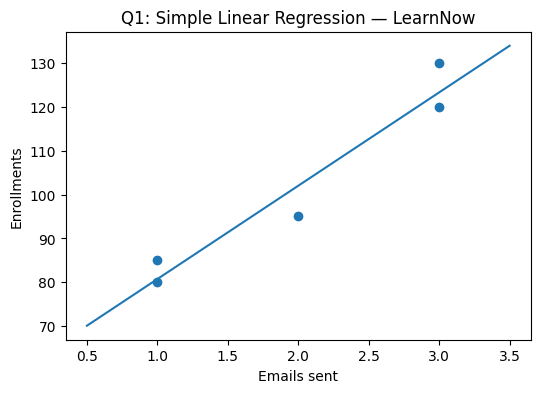

Verification that Predicted = Baseline + SHAP: True


In [1]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data
x = np.array([1,3,2,1,3]).reshape(-1,1)
y = np.array([80,120,95,85,130])

df1 = pd.DataFrame({'Emails': x.ravel(), 'Enrollments': y})
# Fit linear regression
lr = LinearRegression().fit(x, y)
coef = lr.coef_[0]
intercept = lr.intercept_
baseline = y.mean()

# Predictions
pred = lr.predict(x)
# Manual SHAP for simple linear model: shap = prediction - baseline
shap_vals = pred - baseline

df1['Predicted'] = np.round(pred, 3)
df1['Baseline'] = baseline
df1['SHAP'] = np.round(shap_vals, 3)
df1['Error'] = np.round(df1['Predicted'] - df1['Enrollments'], 3)
df1['Note'] = df1.apply(lambda r: 'Over-pred' if r['Predicted']>r['Enrollments'] else ('Under-pred' if r['Predicted']<r['Enrollments'] else 'Exact'), axis=1)

print(f"Model: Enrollments = {intercept:.3f} + {coef:.3f} * Emails")
print(f"Baseline (mean enrollments): {baseline:.3f}\n")
display(df1)

# Plot regression line
plt.figure(figsize=(6,4))
plt.scatter(df1['Emails'], df1['Enrollments'])
xs = np.linspace(df1['Emails'].min()-0.5, df1['Emails'].max()+0.5, 100).reshape(-1,1)
plt.plot(xs, lr.predict(xs))
plt.xlabel('Emails sent')
plt.ylabel('Enrollments')
plt.title('Q1: Simple Linear Regression — LearnNow')
plt.show()

# Verify prediction = baseline + SHAP
verification = np.allclose(df1['Predicted'].values, df1['Baseline'].values + df1['SHAP'].values)
print('Verification that Predicted = Baseline + SHAP:', verification)


## Q2 Problem

Model: Revenue = 628.148 + 3.896*AdSpend + 14.074*Discount
Baseline (mean revenue): 1520.000



,AdSpend,Discount,Revenue,Predicted,Baseline,SHAP_AdSpend,SHAP_Discount,SHAP_sum,Check,Error,Note
0,200,10,1500,1548.148,1520.0,0.000,28.148,28.148,1548.148,48.148,Over-pred
1,300,15,2000,2008.148,1520.0,389.630,98.519,488.149,2008.149,8.148,Over-pred
2,250,5,1700,1672.593,1520.0,194.815,-42.222,152.593,1672.593,-27.407,Under-pred
3,150,10,1400,1353.333,1520.0,-194.815,28.148,-166.667,1353.333,-46.667,Under-pred
4,100,0,1000,1017.778,1520.0,-389.630,-112.593,-502.223,1017.777,17.778,Over-pred


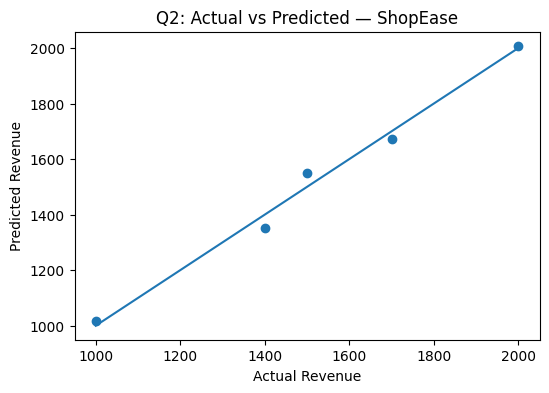

In [2]:

import numpy as np, pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data
X = np.array([[200,10],[300,15],[250,5],[150,10],[100,0]])
y = np.array([1500,2000,1700,1400,1000])
df2 = pd.DataFrame(X, columns=['AdSpend','Discount'])
df2['Revenue'] = y

# Fit multiple linear regression
lr2 = LinearRegression().fit(X, y)
coefs = lr2.coef_
intercept2 = lr2.intercept_
baseline2 = y.mean()

# Compute SHAP per feature as coef_j * (x_j - mean(x_j))
means = df2[['AdSpend','Discount']].mean().values
shap_features = ((X - means) * coefs).round(3)
preds = lr2.predict(X).round(3)

df2['Predicted'] = preds
df2['Baseline'] = baseline2
df2['SHAP_AdSpend'] = shap_features[:,0]
df2['SHAP_Discount'] = shap_features[:,1]
df2['SHAP_sum'] = (df2['SHAP_AdSpend'] + df2['SHAP_Discount']).round(3)
df2['Check'] = (df2['Baseline'] + df2['SHAP_sum']).round(3)
df2['Error'] = (df2['Predicted'] - df2['Revenue']).round(3)
df2['Note'] = df2.apply(lambda r: 'Over-pred' if r['Predicted']>r['Revenue'] else ('Under-pred' if r['Predicted']<r['Revenue'] else 'Exact'), axis=1)

print(f"Model: Revenue = {intercept2:.3f} + {coefs[0]:.3f}*AdSpend + {coefs[1]:.3f}*Discount")
print(f"Baseline (mean revenue): {baseline2:.3f}\n")
display(df2)

# Scatter of actual vs predicted
plt.figure(figsize=(6,4))
plt.scatter(df2['Revenue'], df2['Predicted'])
plt.plot([df2['Revenue'].min(), df2['Revenue'].max()], [df2['Revenue'].min(), df2['Revenue'].max()])
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Q2: Actual vs Predicted — ShopEase')
plt.show()


## Q3 Promblem

Linear model intercept: 151.346
Baseline (mean target on train): 153.737



,index,actual,predicted,baseline,sum_shap
0,287,219.0,139.548,153.736544,-14.190
1,211,70.0,179.517,153.736544,25.782
2,72,202.0,134.039,153.736544,-19.697
3,321,230.0,291.417,153.736544,137.681
4,73,111.0,123.790,153.736544,-29.947


Detailed contributions (feature: contribution) for test index 287
age: 1.664
sex: 10.846
bmi: -4.308
bp: -5.973
s1: -116.971
s2: 65.278
s3: 3.297
s4: 9.342
s5: 22.981
s6: -0.346
Index 287: Pred=139.548, Baseline+SumSHAP=139.547, Match=False
Index 211: Pred=179.517, Baseline+SumSHAP=179.519, Match=True
Index 72: Pred=134.039, Baseline+SumSHAP=134.040, Match=True
Index 321: Pred=291.417, Baseline+SumSHAP=291.418, Match=True
Index 73: Pred=123.790, Baseline+SumSHAP=123.790, Match=True


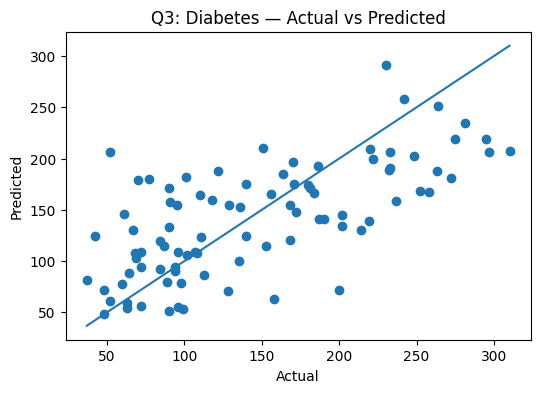

In [3]:

import numpy as np, pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = load_diabetes()
X = data['data']
y = data['target']
feature_names = data['feature_names']

# For readability turn into DataFrame (features are standardized in this dataset)
dfX = pd.DataFrame(X, columns=feature_names)
dfy = pd.Series(y, name='disease_progress')

# Split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=42)

# Fit linear regression
lr3 = LinearRegression().fit(X_train, y_train)
coefs3 = lr3.coef_
intercept3 = lr3.intercept_

baseline3 = y_train.mean()

# Function to compute SHAP-like contributions for linear model
def linear_shap_contributions(model_coef, x_row, mean_x):
    # Contribution = coef_j * (x_j - mean_x_j)
    return (model_coef * (x_row - mean_x)).round(3)

mean_x_train = X_train.mean().values

# Predict and compute contributions for first 5 test rows
preds3 = lr3.predict(X_test).round(3)
results = []
for i, idx in enumerate(X_test.index[:5]):
    xrow = X_test.loc[idx].values
    contribs = linear_shap_contributions(coefs3, xrow, mean_x_train)
    results.append({
        'index': int(idx),
        'actual': float(y_test.loc[idx]),
        'predicted': float(preds3[i]),
        'baseline': float(baseline3),
        'sum_shap': float(contribs.sum()),
        'contribs': dict(zip(feature_names, contribs))
    })

# Display model summary and first example contributions
print(f"Linear model intercept: {intercept3:.3f}")
print(f"Baseline (mean target on train): {baseline3:.3f}\n")
import pandas as pd
display_df = pd.DataFrame([{'index': r['index'], 'actual': r['actual'], 'predicted': r['predicted'], 'baseline': r['baseline'], 'sum_shap': r['sum_shap']} for r in results])
display(display_df)

# Show detailed contributions for the first test record
first = results[0]
print('Detailed contributions (feature: contribution) for test index', first['index'])
for k,v in first['contribs'].items():
    if abs(v) > 0.01:
        print(f"{k}: {v}")

# Verify additive decomposition for first 5 examples
for r in results:
    lhs = r['predicted']
    rhs = r['baseline'] + r['sum_shap']
    print(f"Index {r['index']}: Pred={lhs:.3f}, Baseline+SumSHAP={rhs:.3f}, Match={np.isclose(lhs, rhs)}")

# Plot actual vs predicted for test set
plt.figure(figsize=(6,4))
plt.scatter(y_test, lr3.predict(X_test))
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Q3: Diabetes — Actual vs Predicted')
plt.show()


## Q4 problem

Model: final_score = 50.122 + 2.873*study_time + -2.256*absences + -7.749*failures + 1.742*health
Baseline (mean final score): 65.324



,study_time,absences,failures,health,final_score,predicted,baseline,shap_study,shap_absences,shap_failures,shap_health,shap_sum,check,error,note
0,6,0,0,5,81.032,76.067,65.32412,1.724,4.331,1.240,3.448,10.743,76.067,-4.965,Under-pred
1,1,5,0,5,52.048,50.424,65.32412,-12.641,-6.948,1.240,3.448,-14.901,50.423,-1.624,Under-pred
2,4,2,0,3,57.170,62.327,65.32412,-4.022,-0.180,1.240,-0.035,-2.997,62.327,5.157,Over-pred
3,4,2,0,5,67.515,65.810,65.32412,-4.022,-0.180,1.240,3.448,0.486,65.810,-1.705,Under-pred
4,8,0,1,4,76.132,72.322,65.32412,7.470,4.331,-6.509,1.707,6.999,72.323,-3.810,Under-pred
5,10,1,0,3,82.011,81.820,65.32412,13.215,2.075,1.240,-0.035,16.495,81.819,-0.191,Under-pred
6,4,3,0,4,69.331,61.812,65.32412,-4.022,-2.436,1.240,1.707,-3.511,61.813,-7.519,Under-pred
7,6,1,0,1,67.237,66.845,65.32412,1.724,2.075,1.240,-3.518,1.521,66.845,-0.392,Under-pred
8,3,2,0,1,63.955,55.970,65.32412,-6.895,-0.180,1.240,-3.518,-9.353,55.971,-7.985,Under-pred
9,5,1,0,1,64.005,63.972,65.32412,-1.149,2.075,1.240,-3.518,-1.352,63.972,-0.033,Under-pred


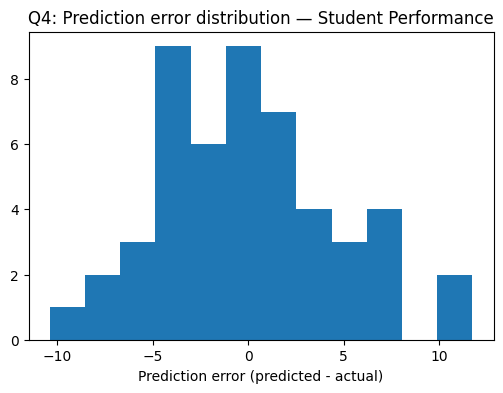

Row 0: Pred=76.067, Baseline+SumSHAP=76.067, Match=True
Row 1: Pred=50.424, Baseline+SumSHAP=50.423, Match=False
Row 2: Pred=62.327, Baseline+SumSHAP=62.327, Match=True
Row 3: Pred=65.810, Baseline+SumSHAP=65.810, Match=True
Row 4: Pred=72.322, Baseline+SumSHAP=72.323, Match=False


In [4]:

import numpy as np, pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Synthetic student dataset (small)
np.random.seed(0)
n=50
study_time = np.random.randint(1,11,size=n)        # hours per week (1-10)
absences = np.random.poisson(2, size=n)            # number of absences
failures = np.random.binomial(1, 0.2, size=n)      # previous failures (0 or 1)
health = np.random.randint(1,6,size=n)             # health 1-5

# Create a synthetic score with noise
# score = 3*study_time - 2*absences - 8*failures + 1.5*health + 50 + noise
score = 3*study_time - 2*absences - 8*failures + 1.5*health + 50 + np.random.normal(0,4,size=n)
score = np.clip(score, 0, 100)

df4 = pd.DataFrame({
    'study_time': study_time,
    'absences': absences,
    'failures': failures,
    'health': health,
    'final_score': np.round(score,3)
})

X4 = df4[['study_time','absences','failures','health']].values
y4 = df4['final_score'].values

lr4 = LinearRegression().fit(X4, y4)
coefs4 = lr4.coef_
intercept4 = lr4.intercept_
baseline4 = y4.mean()
means4 = df4[['study_time','absences','failures','health']].mean().values

# Compute SHAP-like contributions for each record
contribs4 = ((X4 - means4) * coefs4).round(3)
df4['predicted'] = lr4.predict(X4).round(3)
df4['baseline'] = baseline4
df4['shap_study'] = contribs4[:,0]
df4['shap_absences'] = contribs4[:,1]
df4['shap_failures'] = contribs4[:,2]
df4['shap_health'] = contribs4[:,3]
df4['shap_sum'] = (df4['shap_study'] + df4['shap_absences'] + df4['shap_failures'] + df4['shap_health']).round(3)
df4['check'] = (df4['baseline'] + df4['shap_sum']).round(3)
df4['error'] = (df4['predicted'] - df4['final_score']).round(3)
df4['note'] = df4.apply(lambda r: 'Over-pred' if r['predicted']>r['final_score'] else ('Under-pred' if r['predicted']<r['final_score'] else 'Exact'), axis=1)

print(f"Model: final_score = {intercept4:.3f} + " + " + ".join([f"{c:.3f}*{n}" for c,n in zip(coefs4,['study_time','absences','failures','health'])]))
print(f"Baseline (mean final score): {baseline4:.3f}\n")
display(df4.head(10))

# Show distribution of prediction errors
plt.figure(figsize=(6,4))
plt.hist(df4['error'], bins=12)
plt.xlabel('Prediction error (predicted - actual)')
plt.title('Q4: Prediction error distribution — Student Performance')
plt.show()

# Verify additive decomposition for a few rows
for i in range(5):
    row = df4.iloc[i]
    lhs = row['predicted']
    rhs = row['baseline'] + row['shap_sum']
    print(f"Row {i}: Pred={lhs:.3f}, Baseline+SumSHAP={rhs:.3f}, Match={np.isclose(lhs, rhs)}")
